In [ ]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
print(os.path.exists("/content/drive/MyDrive/SS/weatherAUS.csv"))

True


In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/SS/weatherAUS.csv")

In [ ]:
display(ds.head(5))

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: True


In [ ]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  MinTemp
Missing data in  MaxTemp
Missing data in  Rainfall
Missing data in  Evaporation
Missing data in  Sunshine
Missing data in  WindGustDir
Missing data in  WindGustSpeed
Missing data in  WindDir9am
Missing data in  WindDir3pm
Missing data in  WindSpeed9am
Missing data in  WindSpeed3pm
Missing data in  Humidity9am
Missing data in  Humidity3pm
Missing data in  Pressure9am
Missing data in  Pressure3pm
Missing data in  Cloud9am
Missing data in  Cloud3pm
Missing data in  Temp9am
Missing data in  Temp3pm
Missing data in  RainToday
Missing data in  RainTomorrow


In [ ]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustDir 10326
WindGustSpeed 10263
WindDir9am 10566
WindDir3pm 4228
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
RainToday 3261
RainTomorrow 3267


In [ ]:
ds.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
ds.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
ds.pivot_table([
                'MinTemp',
                'MaxTemp',
                'Rainfall',
                'Evaporation',
                'Sunshine',
                'WindGustSpeed',
                'WindSpeed9am',
                'WindSpeed3pm',
                'Humidity9am',
                'Humidity3pm',
                'Pressure9am',
                'Pressure3pm',
                'Cloud9am',
                'Cloud3pm',
                'Temp9am',
                'Temp3pm'],
               ['RainTomorrow'], aggfunc='mean')

,Cloud3pm,Cloud9am,Evaporation,Humidity3pm,Humidity9am,MaxTemp,MinTemp,Pressure3pm,Pressure9am,Rainfall,Sunshine,Temp3pm,Temp9am,WindGustSpeed,WindSpeed3pm,WindSpeed9am
RainTomorrow,,,,,,,,,,,,,,,,
No,3.921896,3.932282,5.734807,46.510625,66.217573,23.836247,11.897675,1016.113587,1018.595599,1.270290,8.546358,22.402905,17.077001,38.288391,18.222804,13.567314
Yes,6.360065,6.099990,4.527779,68.800019,77.983314,21.119100,13.186890,1012.300820,1014.400000,6.142104,4.471761,19.197113,16.676598,45.946764,20.078509,15.508577


In [ ]:
yes= ds[ds['RainTomorrow']=='Yes'].shape[0]
no= ds[ds['RainTomorrow']=='No'].shape[0]

print("Total Yes RainTomorrow {} ".format(yes))
print("Total No RainTomorrow {} ".format(no))

Total Yes RainTomorrow 31877 
Total No RainTomorrow 110316 


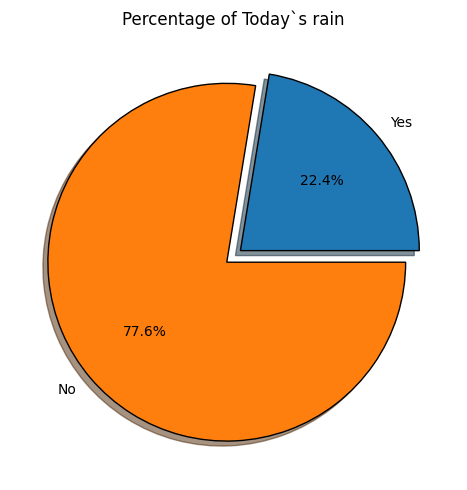

In [ ]:
plt.rcParams["figure.figsize"] = (7,5)
slices=[yes,no]
labels=['Yes','No']
explode=[0.05, 0.05]
plt.pie(slices, labels=labels, explode=explode, wedgeprops={'edgecolor':'black'}, shadow=True, autopct='%1.1f%%')
plt.title("Percentage of Today`s rain")
plt.tight_layout()
plt.show()

<Axes: xlabel='Sunshine', ylabel='count'>

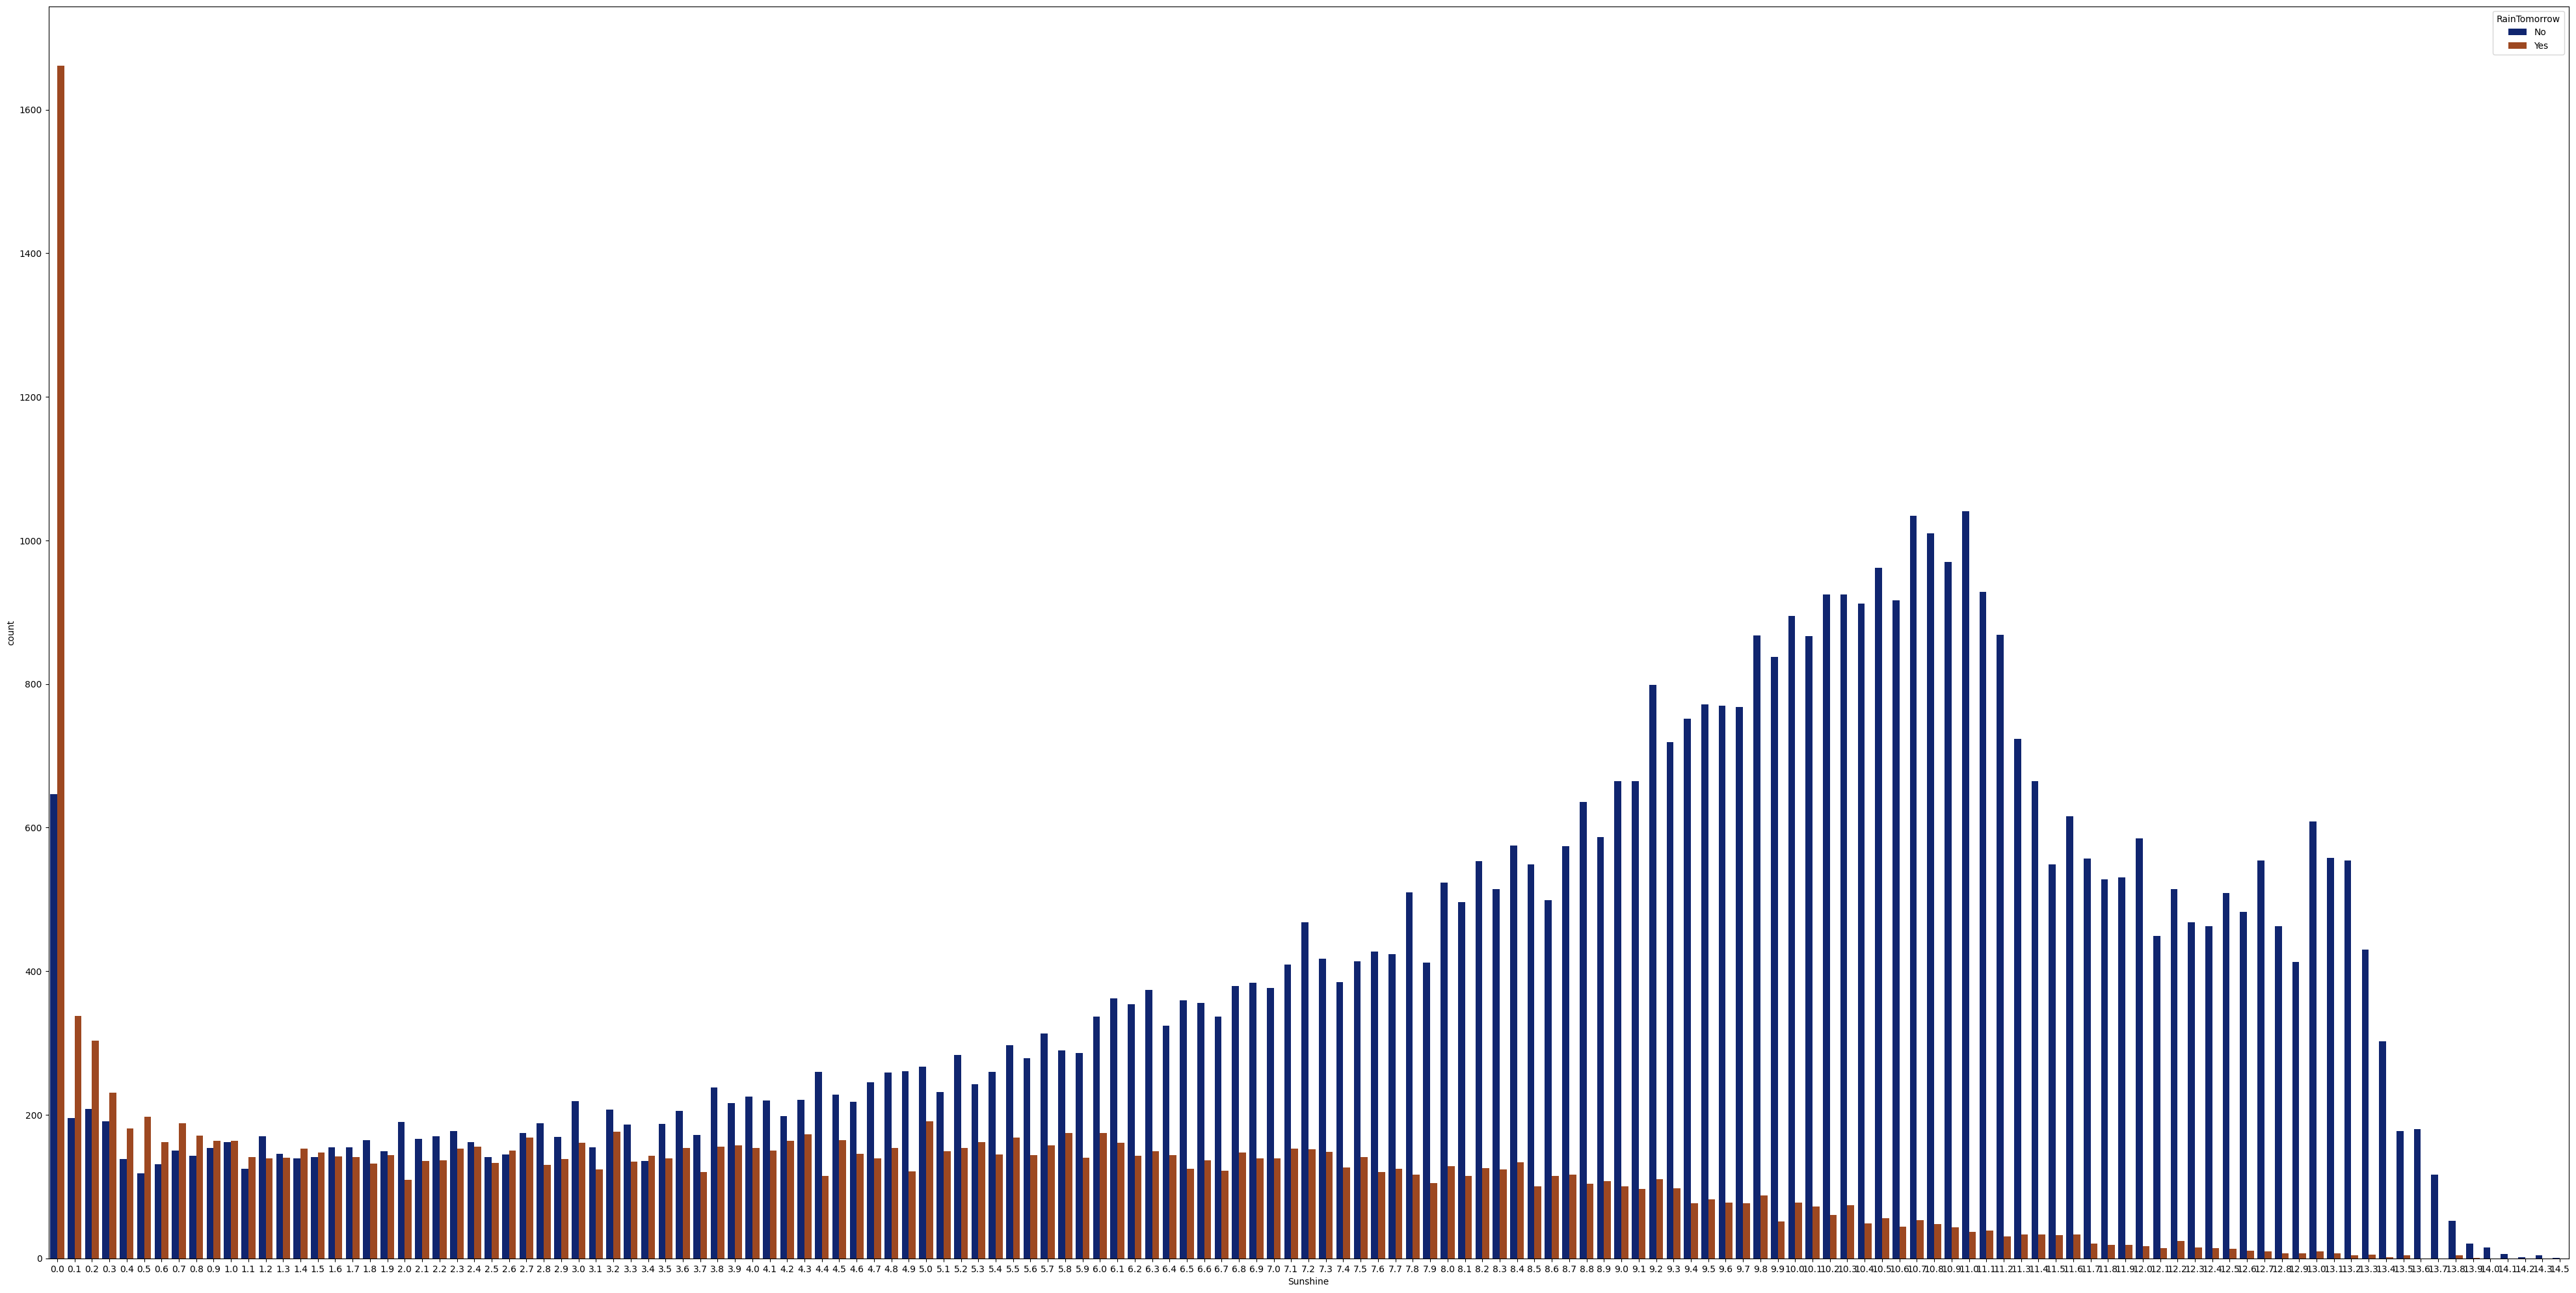

In [ ]:
plt.rcParams["figure.figsize"] = (50,25)
sns.countplot(data=ds, x="Sunshine", hue="RainTomorrow",palette = "dark")

<Axes: xlabel='WindGustSpeed', ylabel='count'>

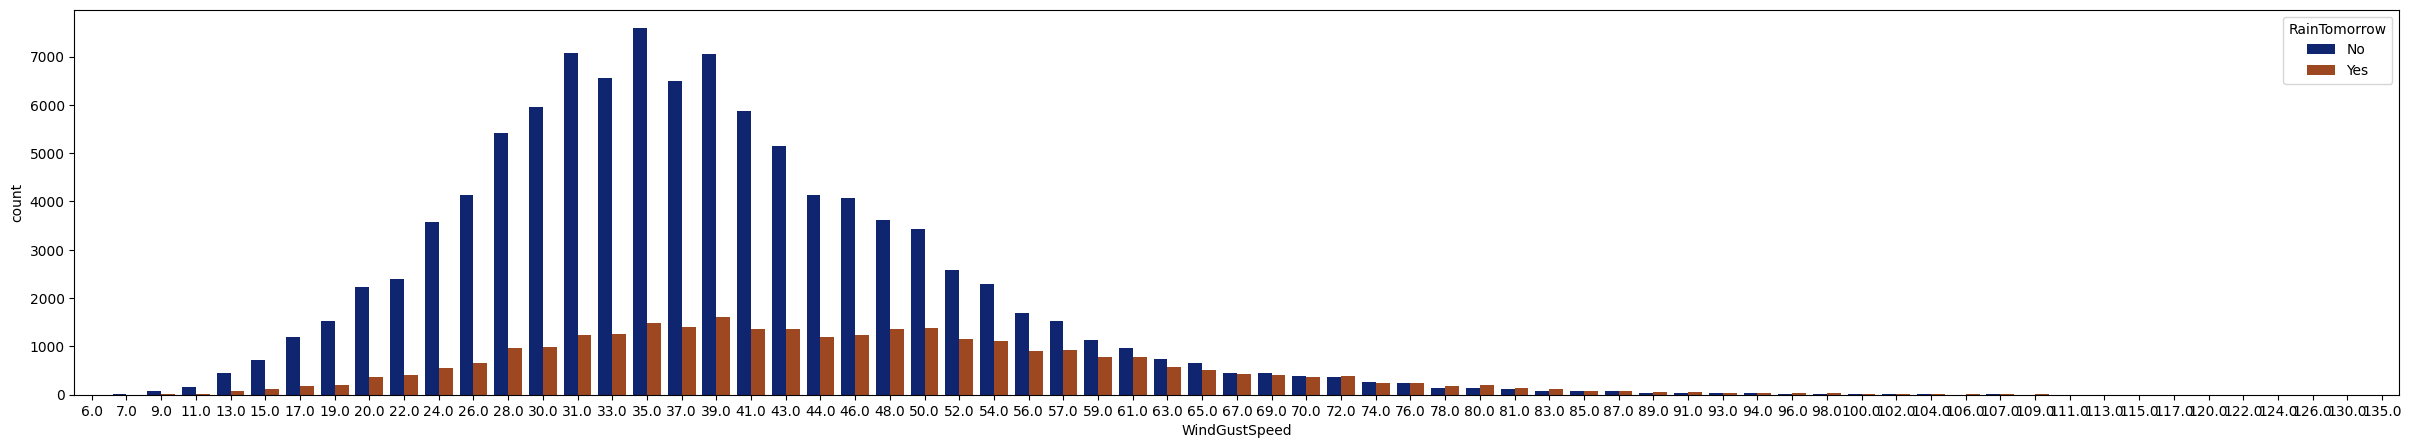

In [ ]:
plt.rcParams["figure.figsize"] = (30,5)
sns.countplot(data=ds, x="WindGustSpeed", hue="RainTomorrow",palette = "dark")

<Axes: xlabel='RainToday', ylabel='count'>

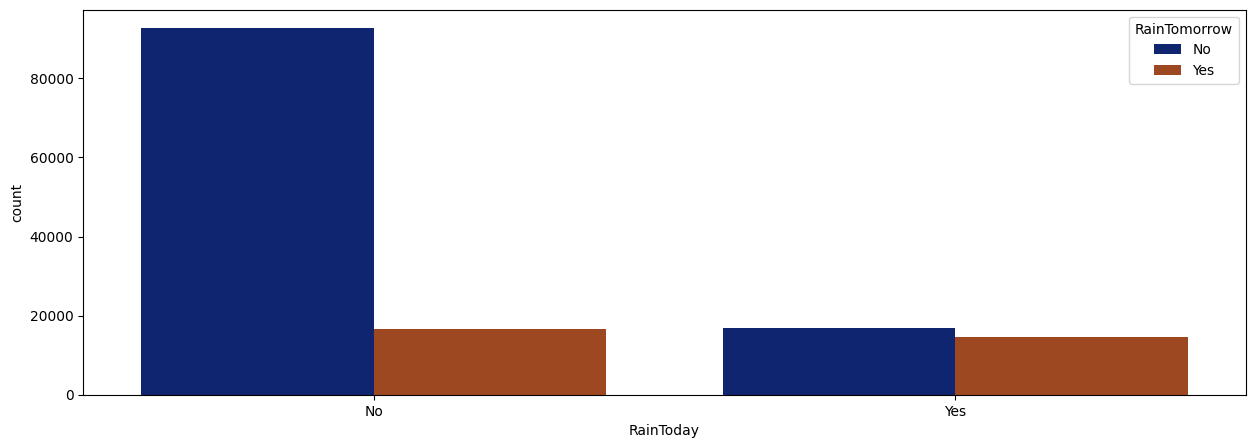

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
sns.countplot(data=ds, x="RainToday", hue="RainTomorrow",palette = "dark")

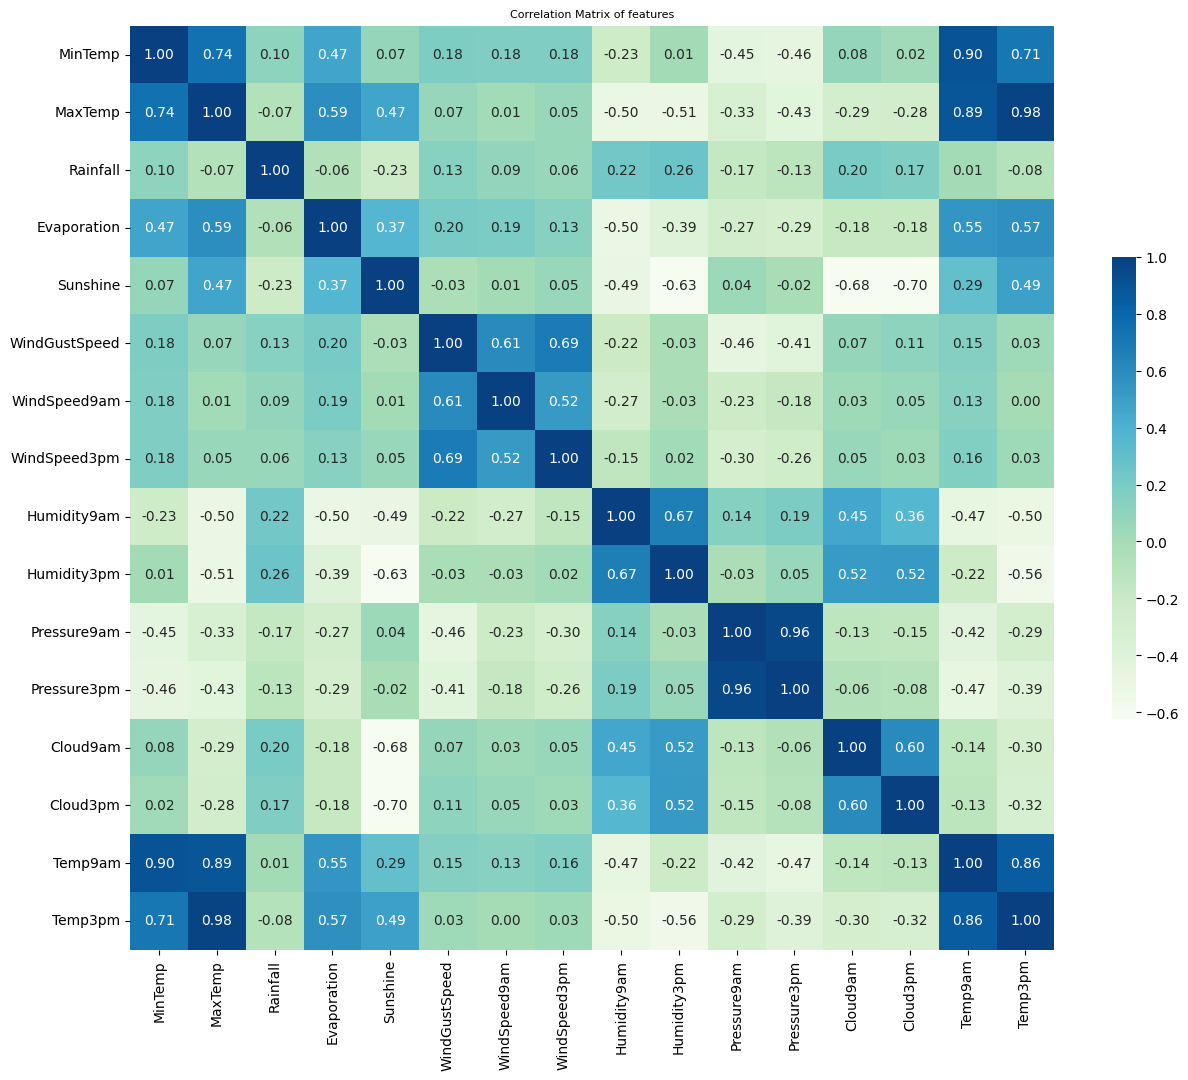

In [ ]:
col_for_corr = ['MinTemp',
                'MaxTemp',
                'Rainfall',
                'Evaporation',
                'Sunshine',
                'WindGustSpeed',
                'WindSpeed9am',
                'WindSpeed3pm',
                'Humidity9am',
                'Humidity3pm',
                'Pressure9am',
                'Pressure3pm',
                'Cloud9am',
                'Cloud3pm',
                'Temp9am',
                'Temp3pm']

plt.rcParams["figure.figsize"] = (15,12)
correlation_matrix = ds[col_for_corr].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()